In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [142]:
# Configurando o pandas em relação a exibição de colunas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set()

In [143]:
# Lendo os dados
treino = pd.read_csv('train.csv', index_col=0).reset_index(drop=True)
teste = pd.read_csv('test.csv')

# Disponibilizando para analise somente os dados permitidos pelo dataset de teste
variaveis_permitidas = np.append(teste.columns.values, ['IN_TREINEIRO'])
treino = treino[variaveis_permitidas]

In [144]:
treino.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,0


In [145]:
treino_info = pd.DataFrame({
    'coluna': treino.columns.values,
    'quantidade_nulos': treino.isnull().sum().values
})
treino_info['percentual_nulos'] = treino_info.quantidade_nulos/treino.shape[0]
treino_info

,coluna,quantidade_nulos,percentual_nulos
0,NU_INSCRICAO,0,0.000000
1,CO_UF_RESIDENCIA,0,0.000000
2,SG_UF_RESIDENCIA,0,0.000000
3,NU_IDADE,0,0.000000
4,TP_SEXO,0,0.000000
5,TP_COR_RACA,0,0.000000
6,TP_NACIONALIDADE,0,0.000000
7,TP_ST_CONCLUSAO,0,0.000000
8,TP_ANO_CONCLUIU,0,0.000000
9,TP_ESCOLA,0,0.000000


In [146]:
treino[treino_info[treino_info.quantidade_nulos==0].coluna.values].corr()['IN_TREINEIRO'].sort_values()

NU_IDADE           -0.295091
TP_ANO_CONCLUIU    -0.257710
TP_ESCOLA          -0.244562
TP_LINGUA          -0.036395
CO_UF_RESIDENCIA   -0.034944
TP_NACIONALIDADE   -0.015179
IN_BAIXA_VISAO     -0.013602
IN_GESTANTE        -0.011893
IN_SURDEZ          -0.007374
IN_IDOSO           -0.004663
IN_DISCALCULIA     -0.003297
IN_DISLEXIA        -0.003297
IN_SABATISTA        0.003824
TP_COR_RACA         0.009676
TP_PRESENCA_LC      0.092454
TP_PRESENCA_MT      0.092454
TP_PRESENCA_CN      0.094692
TP_PRESENCA_CH      0.094692
TP_ST_CONCLUSAO     0.533983
IN_TREINEIRO        1.000000
IN_CEGUEIRA              NaN
Name: IN_TREINEIRO, dtype: float64

In [199]:
treino.groupby(by=['Q047']).IN_TREINEIRO.value_counts()

Q047  IN_TREINEIRO
A     0               10293
      1                1433
B     0                 318
      1                  30
C     0                 152
      1                  10
D     0                 924
      1                 249
E     0                 260
      1                  61
Name: IN_TREINEIRO, dtype: int64

In [147]:
treino.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,0.0,0.000364,0.000073,0.000073,0.009687,0.000947,0.000146,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,0.0,0.019080,0.008534,0.008534,0.097947,0.030757,0.012069,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,419.900000,480.400000,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,514.500000,581.200000,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,806.400000,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


In [148]:
# Verificando o balanceamento das classes
treino.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

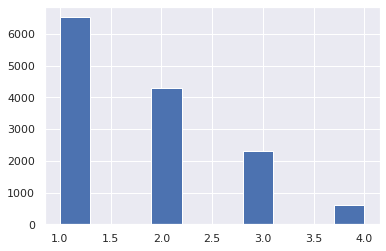

In [149]:
ax = treino.TP_ST_CONCLUSAO.hist()
plt.show()

In [150]:
# Constatando a correlação entre as variáveis
treino.groupby(by=['TP_ST_CONCLUSAO', 'IN_TREINEIRO']).IN_TREINEIRO.count()

TP_ST_CONCLUSAO  IN_TREINEIRO
1                0               6524
2                0               4283
3                0                523
                 1               1783
4                0                617
Name: IN_TREINEIRO, dtype: int64

# Engenharia de recursos

Objetivo é a criação de novos recuros que possam ser úteis nos modelos de classificação.

In [151]:
# Hipotese de que alunos em situação de conclusão tem menos probabilidade de ir para treinar no enem
treino['PROVA_VALENDO_VAGA_NO_ANO'] = treino.TP_ST_CONCLUSAO.apply(lambda x: 1 if np.isin(x, [1, 2]) else 0)

In [152]:
# Hipotese adultos vão menos ao enem para treinar
treino['PESSOA_MAIOR_IDADE'] = treino.NU_IDADE.apply(lambda x: 1 if x >= 18 else 0)

# Hipotese de que alunos em situação de conclusão pela idade tem menos probabilidade de ir para treinar no enem
treino['ALUNO_REGULAR_PELA_IDADE'] = treino.NU_IDADE.apply(lambda x: 1 if x <= 17 else 0)
treino['ALUNO_REGULAR'] = treino.apply(lambda x: 1 if x.NU_IDADE <= 17 and x.TP_ST_CONCLUSAO==3 else 0,
                                       axis=1).values

In [213]:
# Hipotese alunos mais interressandos vão em todos os dias das provas por consequência também são
# os não treineiros
treino['ALUNO_PRESENTE_PROVAS'] = treino.apply(lambda x: 1 if x.TP_PRESENCA_LC==1 
                                               and x.TP_PRESENCA_MT==1
                                               and x.TP_PRESENCA_CN==1
                                               and x.TP_PRESENCA_CH==1 else 0,
                                       axis=1).values

In [229]:
# Preenchendo os dados faltantes com zero
treino.loc[treino.TP_STATUS_REDACAO.isnull(), 'NU_NOTA_REDACAO'] = 0

# Preenchendo os dados com zeros caso não esteja presente para a prova
treino.loc[treino.TP_PRESENCA_CN != 1, 'NU_NOTA_CN'] = 0
treino.loc[treino.TP_PRESENCA_CH != 1, 'NU_NOTA_CH'] = 0
treino.loc[treino.TP_PRESENCA_LC != 1, 'NU_NOTA_LC'] = 0
#treino.loc[treino.TP_PRESENCA_MT != 1, 'nu_nota_mt'] = 0

treino['NU_NOTA_MEDIA'] = (treino.NU_NOTA_CN + treino.NU_NOTA_CH + 
                           treino.NU_NOTA_LC + treino.NU_NOTA_REDACAO)/4

In [233]:
# Verificando se as notas dos treineiros tem diferença para os não treineiros
treino.groupby(by=['IN_TREINEIRO']).agg({
    'NU_NOTA_MEDIA': ['mean', 'median'],
    'NU_NOTA_CN': ['mean', 'median'],
    'NU_NOTA_CH': ['mean', 'median'],
    'NU_NOTA_LC': ['mean', 'median']
}).reset_index()

IN_TREINEIRO NU_NOTA_MEDIA           NU_NOTA_CN         NU_NOTA_CH         NU_NOTA_LC       
                        mean   median        mean median        mean median        mean median
0            0    374.645541  474.350  349.954792  431.6  391.752147  498.4  373.576823  484.1
1            1    429.661091  487.475  401.291924  440.5  446.978351  506.8  432.022995  498.7

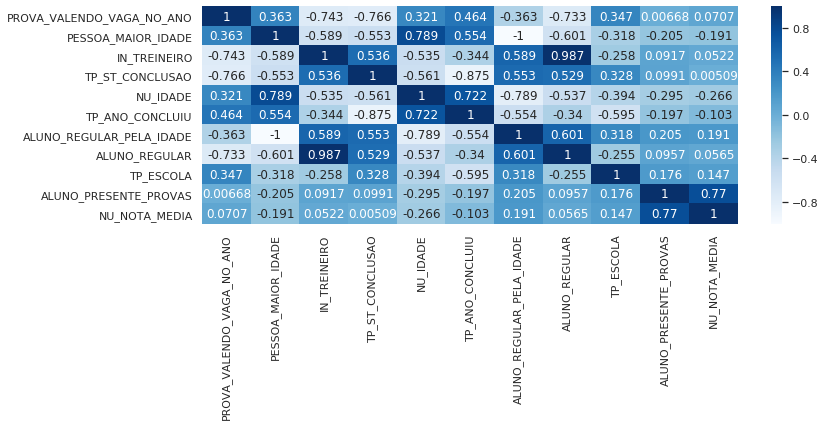

In [234]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(treino[['PROVA_VALENDO_VAGA_NO_ANO', 'PESSOA_MAIOR_IDADE', 
                         'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'NU_IDADE', 
                         'TP_ANO_CONCLUIU', 'ALUNO_REGULAR_PELA_IDADE', 
                         'ALUNO_REGULAR', 'TP_ESCOLA', 'ALUNO_PRESENTE_PROVAS']].corr(method='spearman'),
                annot=True, 
                fmt=".3g",
                cmap='Blues')
plt.show()

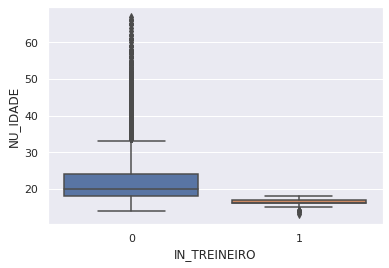

In [154]:
# Verificando as relações de idade e treinamento para o enem
ax = sns.boxplot(treino.IN_TREINEIRO, treino.NU_IDADE)
plt.show()

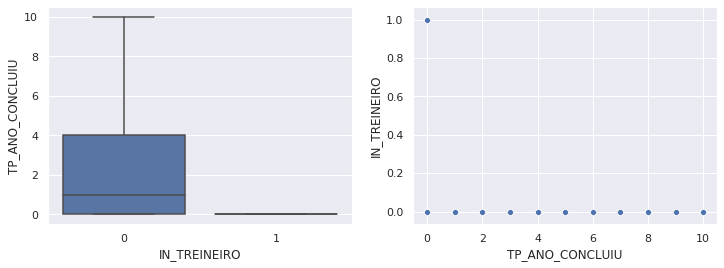

In [155]:
# Verificando o treinamento para o enem em relação ao ano de conclusão
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
ax = sns.boxplot(treino.IN_TREINEIRO, treino.TP_ANO_CONCLUIU)
plt.subplot(1, 2, 2)
ax = sns.scatterplot(x=treino.TP_ANO_CONCLUIU, y=treino.IN_TREINEIRO)
plt.show()

# Hiperparâmetros
Buscando os melhores parâmetros para 2 modelos, onde o melhor será utilizando na solução final

## RandomForestClassifier

In [236]:
variaveis = ['PROVA_VALENDO_VAGA_NO_ANO', 'TP_ST_CONCLUSAO',
             'NU_IDADE', 'TP_ANO_CONCLUIU', 'ALUNO_REGULAR']

y = treino.IN_TREINEIRO
X = treino[variaveis]


# Definindo as amostragens de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [237]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)],
    'max_features': [None, 'auto', 'log2'],
    'max_depth': [None]+[int(x) for x in np.linspace(start = 1, stop = 100, num = 10)],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42), 
                               param_distributions = param_distributions, 
                               n_iter = 10, 
                               cv = 3, 
                               random_state=42)

In [238]:
rf_random.fit(X_train, y_train)

print(f'best params: {rf_random.best_params_}\nbest score: {rf_random.best_score_}')

best params: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 23, 'bootstrap': True}
best score: 0.9970866498051336


In [239]:
y_pred = rf_random.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, digits=4))

[[3577    0]
 [  13  529]]
              precision    recall  f1-score   support

           0     0.9964    1.0000    0.9982      3577
           1     1.0000    0.9760    0.9879       542

    accuracy                         0.9968      4119
   macro avg     0.9982    0.9880    0.9930      4119
weighted avg     0.9969    0.9968    0.9968      4119



In [240]:
erros = [i for i in range(len(y_test)) if y_test.values[i] != y_pred[i]]
erros

[175, 570, 677, 1309, 1702, 1837, 2198, 2538, 2951, 3294, 3722, 3965, 4088]

In [241]:
y_pred[erros]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [242]:
residuos = X_test.iloc[erros].copy()
residuos['PRED'] = y_pred[erros]
residuos['RESP'] = y_test.values[erros]
residuos

,PROVA_VALENDO_VAGA_NO_ANO,TP_ST_CONCLUSAO,NU_IDADE,TP_ANO_CONCLUIU,ALUNO_REGULAR,PRED,RESP
7900,0,3,18,0,0,0,1
4004,0,3,18,0,0,0,1
9815,0,3,18,0,0,0,1
9671,0,3,18,0,0,0,1
7063,0,3,18,0,0,0,1
4826,0,3,18,0,0,0,1
1732,0,3,18,0,0,0,1
2457,0,3,18,0,0,0,1
426,0,3,18,0,0,0,1
1805,0,3,18,0,0,0,1


In [243]:
treino.iloc[residuos.index]

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO,PROVA_VALENDO_VAGA_NO_ANO,PESSOA_MAIOR_IDADE,ALUNO_REGULAR_PELA_IDADE,ALUNO_REGULAR,ALUNO_PRESENTE_PROVAS,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,NU_NOTA_MEDIA
7900,e7d86f554f6b0769f663899e368651151af95774,35,SP,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,E,C,A,B,B,C,A,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.000
4004,012a551858eace1b895a114857c4e64e9c8f5830,31,MG,18,F,3,2,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,B,E,D,B,B,A,NaN,A,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.000
9815,f5699fd8dca679c775117c747b897233913f7d4c,35,SP,18,F,1,2,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,372.7,442.1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,D,D,D,A,B,A,NaN,A,1,0,1,0,0,0,NaN,NaN,0.0,0.0,203.700
9671,1d5ce53899e378f001740bdc0ca836f1219e527f,51,MT,18,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,472.4,533.3,532.6,0,1.0,120.0,120.0,80.0,120.0,80.0,520.0,D,E,F,B,B,A,NaN,A,1,0,1,0,0,1,NaN,NaN,NaN,NaN,514.575
7063,ee6c82bc67c27872ebe33bdd33cfa5e79c7b6a8c,15,PA,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,480.2,518.8,451.2,1,1.0,80.0,100.0,80.0,80.0,80.0,420.0,B,C,C,A,A,A,NaN,A,1,0,1,0,0,1,NaN,NaN,NaN,NaN,467.550
4826,6b1333efc33833bf295bb9b8bb6410093650b704,51,MT,18,F,0,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,502.4,624.9,591.2,0,1.0,100.0,100.0,80.0,140.0,100.0,520.0,F,G,O,D,B,A,NaN,A,1,0,1,0,0,1,NaN,NaN,NaN,NaN,559.625
1732,47ec911940a1d2541c8cfad45b5cd27c58914098,23,CE,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,D,D,C,B,B,C,B,A,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.000
2457,851f39663a73e9159bc0faac7d837f6fea10fa5d,25,PB,18,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,498.7,519.0,562.2,1,1.0,140.0,160.0,120.0,140.0,120.0,680.0,D,D,C,B,A,A,NaN,C,1,0,1,0,0,1,NaN,NaN,NaN,NaN,564.975
426,7be49b1fc65e7dd7a4ad0722e441ef665c3dc1d1,43,RS,18,M,1,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,456.2,588.1,556.7,0,1.0,120.0,120.0,120.0,120.0,60.0,540.0,D,F,G,C,A,A,NaN,A,1,0,1,0,0,1,NaN,NaN,NaN,NaN,535.250
1805,0b0033664f0a5a2e45a7173fb9865d68c8f79423,23,CE,18,M,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,454.2,0,1.0,80.0,40.0,40.0,40.0,0.0,200.0,G,G,D,B,B,A,NaN,A,1,0,1,0,0,0,0.0,0.0,NaN,NaN,163.550


## GradientBoosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)],
    'max_features': [None, 'auto', 'log2'],
    'max_depth': [None]+[int(x) for x in np.linspace(start = 1, stop = 100, num = 10)],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}


gb_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, random_state=42), 
                               param_distributions = param_distributions, 
                               n_iter = 30, 
                               cv = 3, 
                               random_state=42)

In [67]:
gb_random.fit(X_train, y_train)

print(f'best params: {gb_random.best_params_}\nbest score: {gb_random.best_score_}')

best params: {'n_estimators': 890, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 78}
best score: 0.9970866498051336


# Conclusão


Ambos os modelos tem o mesmo melhor score não fazendo diferença para a seleção aparentemente.

# Realizando undersampling

In [23]:
df_treineiro = treino[treino.IN_TREINEIRO==1].copy()
df_nao_treineiro = treino[treino.IN_TREINEIRO==0].sample(df_treineiro.shape[0], random_state=42)

df_balanceado = pd.concat([df_treineiro, df_nao_treineiro])

In [24]:
df_balanceado.IN_TREINEIRO.value_counts()

1    1783
0    1783
Name: IN_TREINEIRO, dtype: int64

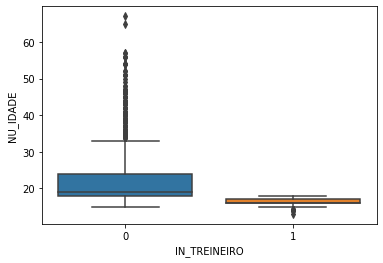

In [25]:
ax = sns.boxplot(df_balanceado.IN_TREINEIRO, df_balanceado.NU_IDADE)
plt.show()

In [26]:
y = df_balanceado.IN_TREINEIRO
X = df_balanceado[variaveis]
# Definindo as amostragens de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [27]:
rf_random.fit(X_train, y_train)

print(f'best params: {rf_random.best_params_}\nbest score: {rf_random.best_score_}')

best params: {'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 89, 'bootstrap': False}
best score: 0.9931891025641026


In [28]:
y_pred = rf_random.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, digits=4))

[[506   9]
 [  0 555]]
              precision    recall  f1-score   support

           0     1.0000    0.9825    0.9912       515
           1     0.9840    1.0000    0.9920       555

    accuracy                         0.9916      1070
   macro avg     0.9920    0.9913    0.9916      1070
weighted avg     0.9917    0.9916    0.9916      1070



# Sumissão

Realizando treinamento do `RandomForestClassifier` com todos os dados

In [266]:
# Treinando o modelo com todos os dados
y = treino.IN_TREINEIRO
X = treino[variaveis]

modelo_rf = RandomForestClassifier(n_estimators = 10, 
                                   min_samples_split = 5,
                                   min_samples_leaf = 2,
                                   max_features = None,
                                   max_depth = 23,
                                   bootstrap = True,
                                   random_state = 42)


modelo_rf.fit(X, y)


# Criando os novos recursos
teste['PROVA_VALENDO_VAGA_NO_ANO'] = teste.TP_ST_CONCLUSAO.apply(lambda x: 1 if np.isin(x, [1, 2]) else 0)
teste['ALUNO_REGULAR'] = teste.apply(lambda x: 1 if x.NU_IDADE <= 17 and x.TP_ST_CONCLUSAO==3 else 0,
                                     axis=1).values
X = teste[variaveis]
y_pred = modelo_rf.predict(X)

In [270]:
submissao = pd.DataFrame({
    'NU_INSCRICAO': teste.NU_INSCRICAO.values,
    'IN_TREINEIRO': y_pred
})
submissao.to_csv('answer.csv', index = False)

**DESAFIO FINALIZADO! SEU SCORE: 99.737418%**